Importer les librairies

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np


Charger le dataset CIFAR-10

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print(x_train.shape)  # (50000, 32, 32, 3)
print(x_test.shape)   # (10000, 32, 32, 3)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


Normalisation des images

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0


Visualiser une image

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

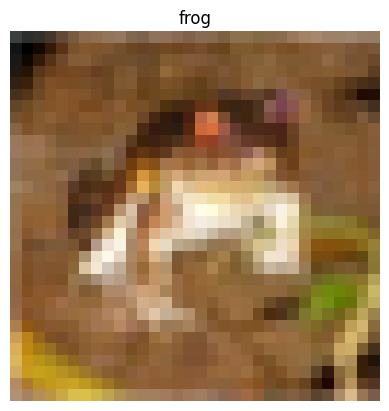

In [4]:
class_names = [
    'airplane','automobile','bird','cat','deer',
    'dog','frog','horse','ship','truck'
]

plt.imshow(x_train[0])
plt.title(class_names[y_train[0][0]])
plt.axis('off')


Créer le modèle

In [5]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compiler le modèle

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Entraîner le modèle

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.3859 - loss: 1.6855 - val_accuracy: 0.5889 - val_loss: 1.1918
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 36ms/step - accuracy: 0.6034 - loss: 1.1330 - val_accuracy: 0.6367 - val_loss: 1.0340
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.6634 - loss: 0.9677 - val_accuracy: 0.6617 - val_loss: 0.9731
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.6988 - loss: 0.8705 - val_accuracy: 0.6739 - val_loss: 0.9419
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7249 - loss: 0.7929 - val_accuracy: 0.6803 - val_loss: 0.9135
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.7481 - loss: 0.7301 - val_accuracy: 0.6902 - val_loss: 0.9070
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.7664 - loss: 0.6699 - val_accuracy: 0.6922 - val_loss: 0.9156
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.7821 -

Évaluer le modèle

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7032 - loss: 0.9412
Test accuracy: 0.7032999992370605


Tester une prédiction

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

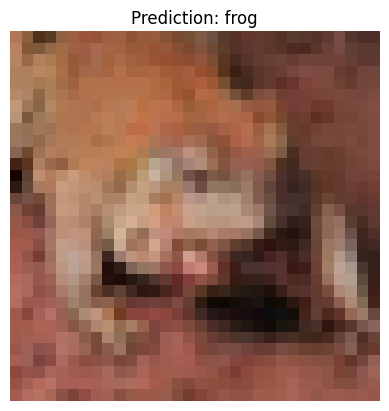

In [ ]:
predictions = model.predict(x_test)

index = 5
plt.imshow(x_test[index])
plt.title("Prediction: " + class_names[np.argmax(predictions[index])])
plt.axis('off')


Sauvegarder le modèle

In [ ]:
model.save('cifar10_model.h5')
print("✓ Model saved as 'cifar10_model.h5'")